Epoch 1/100


C:\Users\vatch\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2161 - mae: 0.7744 - val_loss: 0.4386 - val_mae: 0.4663
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4132 - mae: 0.4565 - val_loss: 0.3835 - val_mae: 0.4384
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3665 - mae: 0.4319 - val_loss: 0.4385 - val_mae: 0.4551
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3888 - mae: 0.4350 - val_loss: 0.3514 - val_mae: 0.4144
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3378 - mae: 0.4112 - val_loss: 0.3467 - val_mae: 0.4114
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3533 - mae: 0.4152 - val_loss: 0.3407 - val_mae: 0.4047
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3404 - mae: 0.4045 - val_loss: 0.3339 - val_mae: 0.4127
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3189 - mae: 0.3927 - val_loss: 0.3284 - val_mae: 0.3915
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

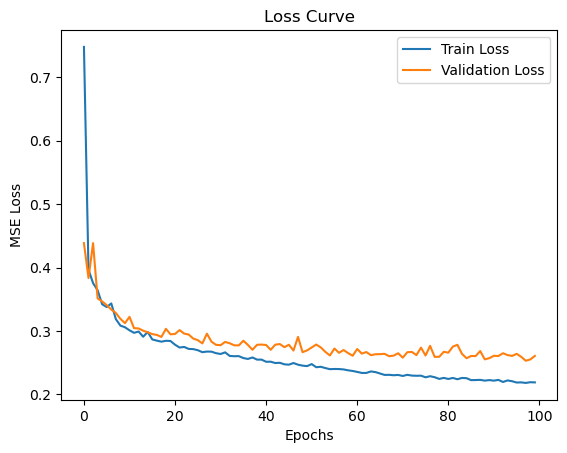

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2567 - mae: 0.3383
Test MSE: 0.2607, Test MAE: 0.3391


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target  # Features and target

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# Evaluate on test set
mse, mae = model.evaluate(X_test, y_test)
print(f'Test MSE: {mse:.4f}, Test MAE: {mae:.4f}')
